# Abstract

Implementing of Simple Linear Regression Model for predicting a quantitative response Y from a single predictor variable X using Least Squares Method.

In [157]:
"""
Created on Sun Jul 05 15:00:16 2020

@author: Gideon Silva
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [158]:
class SimpleLinearRegressionModel:
    
    def __init__(self, feature, response):
        self.feature = feature
        self.response = response
        self.b0 = 0.0
        self.b1 = 0.0

    def fit_model(self):
        # use Least Squares.
        x_mean = np.mean(self.feature)
        y_mean = np.mean(self.response)
        self.b1 = np.sum((self.feature - x_mean)*(self.response - y_mean))/np.sum((self.feature - x_mean)**2)
        self.b0 = y_mean - self.b1*x_mean
        
        y_hat = self.b1*self.feature + self.b0
        self.plot_line_regression(self.feature, self.response, y_hat, 'Linear Regression (Training)')
        self.plot_results()
        
    def predict(self, x_test, y_test):
        y_hat = self.b1*x_test + self.b0
        self.plot_line_regression(x_test, y_test, y_hat, 'Linear Regression (Test)')
        return y_hat
        
    def plot_line_regression(self, x, y, y_hat, title): 
        plt.figure()
        plt.scatter(x, y, color='b', edgecolors='black')
        plt.plot(x, y_hat, label=('Line Regression'))
        plt.title(title)
        plt.legend()
        plt.xlabel('TV ($)')
        plt.ylabel('Sales ($)')
        
    def plot_results(self):
        y_hat = self.b1*self.feature + self.b0
        ss_res = np.sum( (self.response - y_hat)**2 )
        y_mean = np.mean(self.response)
        ss_tot = np.sum( (self.response - y_mean)**2 )
        
        r2 = 1 - ss_res/ss_tot

        print('\n----------------------------------------------------------\n')
        print('Coefficient of determination (R2) = {:.4f}\n'.format(r2))
        print('Coefficients:\nb0 = {:.3f}\nb1 = {:.3f}\n'.format(self.b0,self.b1))  
        

In [159]:
def read_data():
    df_data = pd.read_csv('datasets/Advertising.csv')
    print(df_data.head())
    
    return df_data

In [160]:
def main():
    
    df_data = read_data()
    
    x_train, x_test, y_train, y_test = train_test_split(df_data['TV'], df_data['sales'], test_size=0.3)
    
    feature = x_train.to_numpy()
    response = y_train.to_numpy()
    regression_model = SimpleLinearRegressionModel(feature, response)
    regression_model.fit_model()
    regression_model.predict(x_test.to_numpy(), y_test.to_numpy())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

----------------------------------------------------------

Coefficient of determination (R2) = 0.5703

Coefficients:
b0 = 7.141
b1 = 0.046



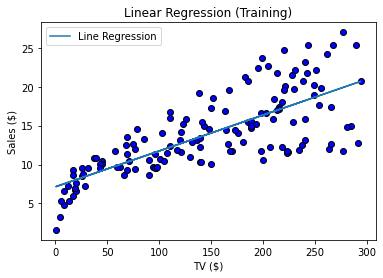

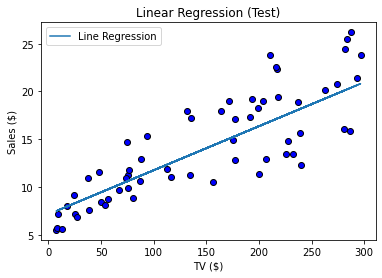

In [161]:
if __name__ == '__main__':
    main()